In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import Helper_Functions as hf
sns.set()

In [4]:
rb_df_2018 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/RbStats2018.csv")
rb_df_2019 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/RbStats2019.csv")
rb_df_2020 = pd.read_csv("C:/Users/Schlenker18/Documents/GitHub/2021-Fantasy-Football-Rankings/WebScrapers/RbStats2020.csv")

In [5]:
rb_2018 = rb_df_2018[["PLAYER", "G", "FPTS/PPR", "FPTS/G-PPR"]]
rb_2019 = rb_df_2019[["PLAYER", "G", "FPTS/PPR", "FPTS/G-PPR"]]
rb_2020 = rb_df_2020[["PLAYER", "G", "FPTS/PPR", "FPTS/G-PPR"]]

In [6]:
rb_2018.loc[0,"PLAYER"]

'Todd Gurley II (LAR) '

In [7]:
def drop_team(df):
    this_df = df.copy()
    for i in range(len(df)):
        this_df.loc[i,"PLAYER"] = hf.get_player(df.loc[i,"PLAYER"])
    return this_df

In [8]:
# dropping player teams from Dataframes
new_rb_2018 = rb_2018.copy()
new_rb_2019 = rb_2019.copy()
new_rb_2020 = rb_2020.copy()

new_rb_2018 = drop_team(new_rb_2018)
new_rb_2019 = drop_team(new_rb_2019)
new_rb_2020 = drop_team(new_rb_2020)

In [9]:
new_rb_2020.head()

,PLAYER,G,FPTS/PPR,FPTS/G-PPR
0,Alvin Kamara,15,336.3,22.42
1,Derrick Henry,16,323.6,20.23
2,Dalvin Cook,14,315.8,22.56
3,David Montgomery,15,237.8,15.85
4,Aaron Jones,14,235.4,16.81


In [10]:
# rbs for 2018 and 2019 joined
result_1 = pd.merge(new_rb_2019,
                    new_rb_2018,
                    how = "left",
                    on = "PLAYER")

# rbs for 18,19,20 joined
result = pd.merge(new_rb_2020,
         result_1,
         how = "left",
         on = "PLAYER",
         sort = False)

result.head(55)

,PLAYER,G,FPTS/PPR,FPTS/G-PPR,G_x,FPTS/PPR_x,FPTS/G-PPR_x,G_y,FPTS/PPR_y,FPTS/G-PPR_y
0,Alvin Kamara,15,336.3,22.42,14.0,208.0,14.86,15.0,313.7,20.91
1,Derrick Henry,16,323.6,20.23,15.0,285.6,19.04,16.0,193.8,12.11
2,Dalvin Cook,14,315.8,22.56,14.0,265.9,18.99,11.0,132.0,12
3,David Montgomery,15,237.8,15.85,16.0,157.9,9.87,0.0,0.0,#DIV/0!
4,Aaron Jones,14,235.4,16.81,16.0,290.3,18.14,12.0,158.5,13.21
5,Jonathan Taylor,15,234.8,15.65,0.0,0.0,#DIV/0!,0.0,0.0,#DIV/0!
6,James Robinson,14,225.9,16.14,0.0,0.0,#DIV/0!,0.0,0.0,#DIV/0!
7,Josh Jacobs,15,214.8,14.32,13.0,181.6,13.97,0.0,0.0,#DIV/0!
8,Nick Chubb,12,199.7,16.64,16.0,237.2,14.83,16.0,184.5,11.53
9,Kareem Hunt,16,199.5,12.47,9.0,82.9,9.21,11.0,217.2,19.75


In [11]:
# exploring RB 2020 df
rb_df_2020

,RANK,PLAYER,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,FPTS/PPR,FPTS/G-PPR,OWN
0,2,Alvin Kamara (NO),187,932,5.0,49,0,16,83,107,756,9.1,5,0,15,294.8,19.7,336.3,22.42,99.90%
1,1,Derrick Henry (TEN),378,"2,027",5.4,94,0,17,19,31,114,6.0,0,2,16,314.1,19.6,323.6,20.23,100.00%
2,3,Dalvin Cook (MIN),312,"1,557",5.0,70,0,16,44,54,361,8.2,1,3,14,293.8,21.0,315.8,22.56,100.00%
3,6,David Montgomery (CHI),247,"1,070",4.3,80,0,8,54,68,438,8.1,2,1,15,210.8,14.1,237.8,15.85,96.70%
4,5,Aaron Jones (GB),201,"1,104",5.5,77,0,9,47,63,355,7.6,2,0,14,211.9,15.1,235.4,16.81,99.80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,291,Kenjon Barner (TB),0,0,0.0,0,0,0,0,1,0,0.0,0,0,6,0.0,0.0,0.0,0,0.00%
291,292,Tim Flanders (NO),0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,#DIV/0!,0.00%
292,293,Brennan Clay (DEN),0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,#DIV/0!,0.00%
293,294,Nate McCrary (BAL),0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,0.0,0.0,0.0,#DIV/0!,0.00%


In [23]:
# eliminating players with 0 fantasy pts
df = rb_df_2020.copy()
df = df.loc[df['FPTS'] > 20]
df

,RANK,PLAYER,ATT,YDS,Y/A,LG,20+,TD,REC,TGT,YDS.1,Y/R,TD.1,FL,G,FPTS,FPTS/G,FPTS/PPR,FPTS/G-PPR,OWN
0,2,Alvin Kamara (NO),187,932,5.0,49,0,16,83,107,756,9.1,5,0,15,294.8,19.7,336.3,22.42,99.90%
1,1,Derrick Henry (TEN),378,"2,027",5.4,94,0,17,19,31,114,6.0,0,2,16,314.1,19.6,323.6,20.23,100.00%
2,3,Dalvin Cook (MIN),312,"1,557",5.0,70,0,16,44,54,361,8.2,1,3,14,293.8,21.0,315.8,22.56,100.00%
3,6,David Montgomery (CHI),247,"1,070",4.3,80,0,8,54,68,438,8.1,2,1,15,210.8,14.1,237.8,15.85,96.70%
4,5,Aaron Jones (GB),201,"1,104",5.5,77,0,9,47,63,355,7.6,2,0,14,211.9,15.1,235.4,16.81,99.80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,90,Travis Homer (SEA),25,88,3.5,12,0,0,9,10,90,10.0,1,0,9,23.8,2.6,28.3,3.14,0.60%
90,89,JaMycal Hasty (SF),39,148,3.8,20,0,1,7,8,33,4.7,0,0,8,24.1,3.0,27.6,3.45,0.70%
91,92,Ameer Abdullah (MIN),8,42,5.3,13,0,0,8,9,58,7.3,2,0,16,22.0,1.4,26.0,1.63,0.60%
95,93,Antonio Williams (BUF),12,63,5.3,18,0,2,1,1,20,20.0,0,0,1,20.3,20.3,20.8,20.8,0.10%


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 98
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RANK        94 non-null     int64  
 1   PLAYER      94 non-null     object 
 2   ATT         94 non-null     int64  
 3   YDS         94 non-null     object 
 4   Y/A         94 non-null     float64
 5   LG          94 non-null     int64  
 6   20+         94 non-null     int64  
 7   TD          94 non-null     int64  
 8   REC         94 non-null     int64  
 9   TGT         94 non-null     int64  
 10  YDS.1       94 non-null     int64  
 11  Y/R         94 non-null     float64
 12  TD.1        94 non-null     int64  
 13  FL          94 non-null     int64  
 14  G           94 non-null     int64  
 15  FPTS        94 non-null     float64
 16  FPTS/G      94 non-null     float64
 17  FPTS/PPR    94 non-null     float64
 18  FPTS/G-PPR  94 non-null     object 
 19  OWN         94 non-null     obj

In [41]:
df['YDS'] = df['YDS'].astype(str) # turning object into string
df['YDS'] = df['YDS'].str.replace(",", "") # getting rid of commas
df['YDS'] = pd.to_numeric(df['YDS'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 98
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RANK        94 non-null     int64  
 1   PLAYER      94 non-null     object 
 2   ATT         94 non-null     int64  
 3   YDS         94 non-null     int64  
 4   Y/A         94 non-null     float64
 5   LG          94 non-null     int64  
 6   20+         94 non-null     int64  
 7   TD          94 non-null     int64  
 8   REC         94 non-null     int64  
 9   TGT         94 non-null     int64  
 10  YDS.1       94 non-null     int64  
 11  Y/R         94 non-null     float64
 12  TD.1        94 non-null     int64  
 13  FL          94 non-null     int64  
 14  G           94 non-null     int64  
 15  FPTS        94 non-null     float64
 16  FPTS/G      94 non-null     float64
 17  FPTS/PPR    94 non-null     float64
 18  FPTS/G-PPR  94 non-null     object 
 19  OWN         94 non-null     obj

In [43]:
# turning these fields into numeric field
df['FPTS/G-PPR'] = pd.to_numeric(df['FPTS/G-PPR']) 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 98
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RANK        94 non-null     int64  
 1   PLAYER      94 non-null     object 
 2   ATT         94 non-null     int64  
 3   YDS         94 non-null     int64  
 4   Y/A         94 non-null     float64
 5   LG          94 non-null     int64  
 6   20+         94 non-null     int64  
 7   TD          94 non-null     int64  
 8   REC         94 non-null     int64  
 9   TGT         94 non-null     int64  
 10  YDS.1       94 non-null     int64  
 11  Y/R         94 non-null     float64
 12  TD.1        94 non-null     int64  
 13  FL          94 non-null     int64  
 14  G           94 non-null     int64  
 15  FPTS        94 non-null     float64
 16  FPTS/G      94 non-null     float64
 17  FPTS/PPR    94 non-null     float64
 18  FPTS/G-PPR  94 non-null     float64
 19  OWN         94 non-null     obj

array([[<AxesSubplot:title={'center':'RANK'}>,
        <AxesSubplot:title={'center':'ATT'}>,
        <AxesSubplot:title={'center':'YDS'}>,
        <AxesSubplot:title={'center':'Y/A'}>],
       [<AxesSubplot:title={'center':'LG'}>,
        <AxesSubplot:title={'center':'20+'}>,
        <AxesSubplot:title={'center':'TD'}>,
        <AxesSubplot:title={'center':'REC'}>],
       [<AxesSubplot:title={'center':'TGT'}>,
        <AxesSubplot:title={'center':'YDS.1'}>,
        <AxesSubplot:title={'center':'Y/R'}>,
        <AxesSubplot:title={'center':'TD.1'}>],
       [<AxesSubplot:title={'center':'FL'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'FPTS'}>,
        <AxesSubplot:title={'center':'FPTS/G'}>],
       [<AxesSubplot:title={'center':'FPTS/PPR'}>,
        <AxesSubplot:title={'center':'FPTS/G-PPR'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

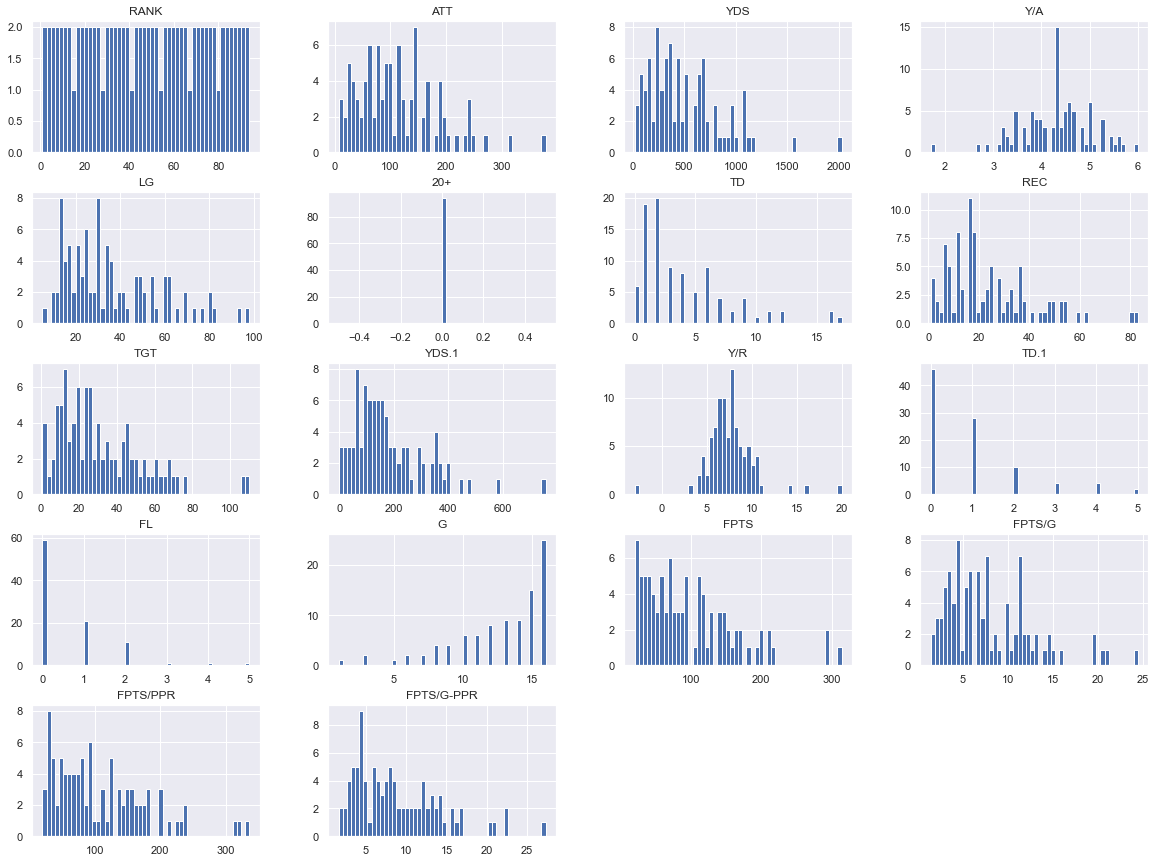

In [45]:
df.hist(bins = 50, figsize = (20,15))

In [61]:
df['FPTS'] = pd.cut(df['FPTS'],
                    bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                    labels = [1, 2, 3, 4, 5])

df['FPTS'].hist()

TypeError: '<' not supported between instances of 'float' and 'pandas._libs.interval.Interval'